In [1]:
# Import Libraries
import datetime                       # Used for working with dates and times
import numpy as np                    # Numpy is Numerical Python. It is an andvance mathematics toolkit.
import matplotlib as mpl              # Matplotlib lets you make plots out of your data.
from matplotlib import pyplot as plt  # PyPlot is an interface that can make Matplotlib easier to work with.
import pandas as pd                   # Pandas stands for PANel DAta. It lets you put your data into dataframes and makes the data easier to work with.

# The following command allows the plots to show up in the JupyterLab.
%matplotlib inline

In [2]:
# This code block sets default parameters for the plots that are made later.
mpl.rcParams['font.size']      = 18      # Font Size
mpl.rcParams['font.weight']    = 'bold'  # Make fonts bold
mpl.rcParams['axes.grid']      = True    # Put a gridlines on the plots
mpl.rcParams['grid.linestyle'] = ':'     # Use dotted lines for the gridlines
mpl.rcParams['axes.xmargin']   = 0       # Don't add any extra space before or after the data shown in the plots.

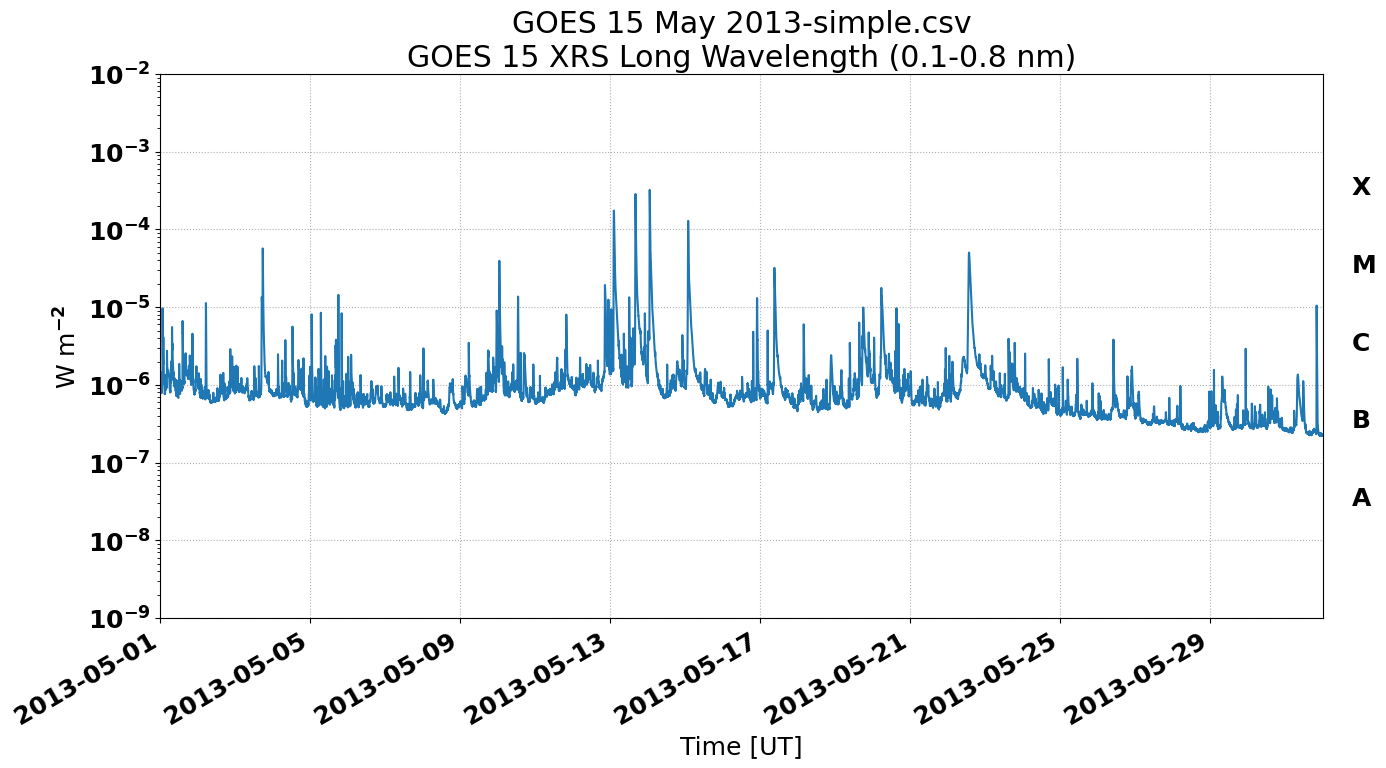

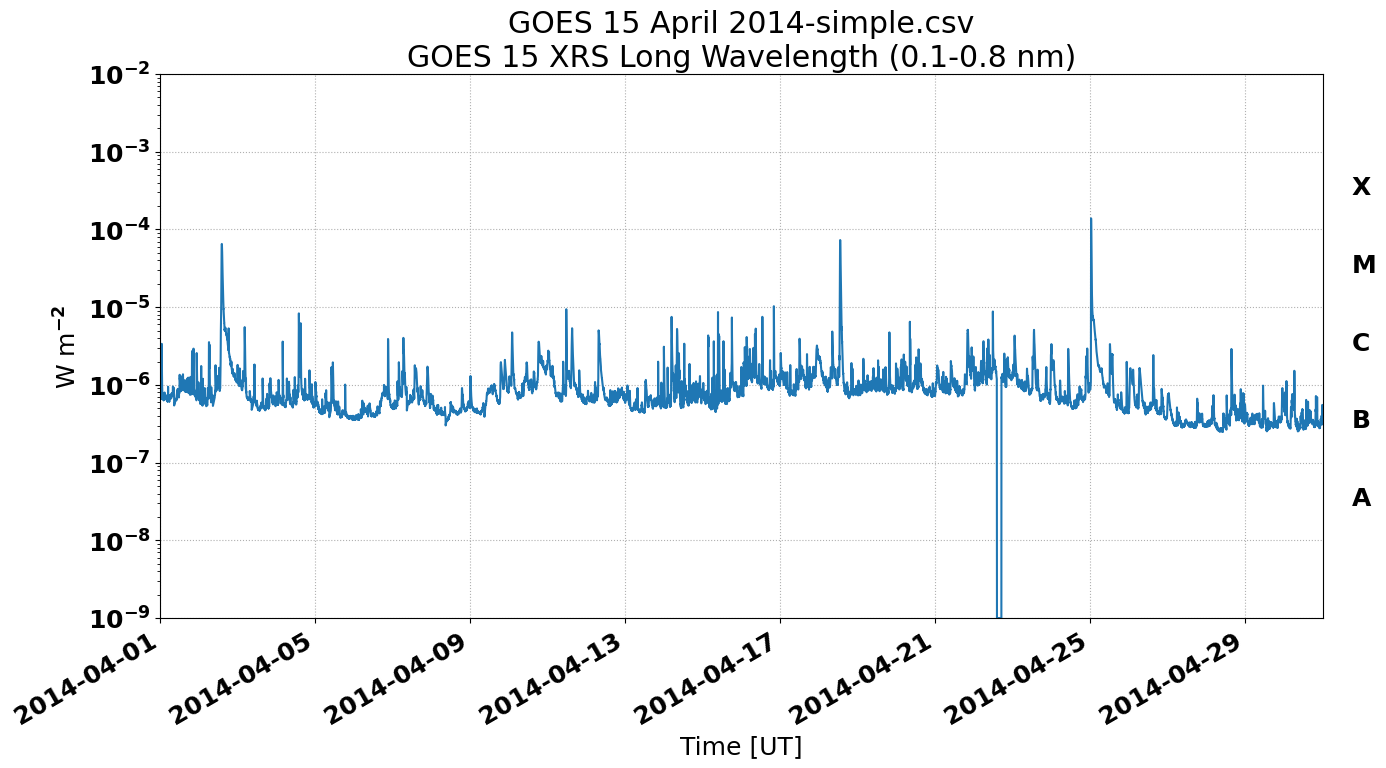

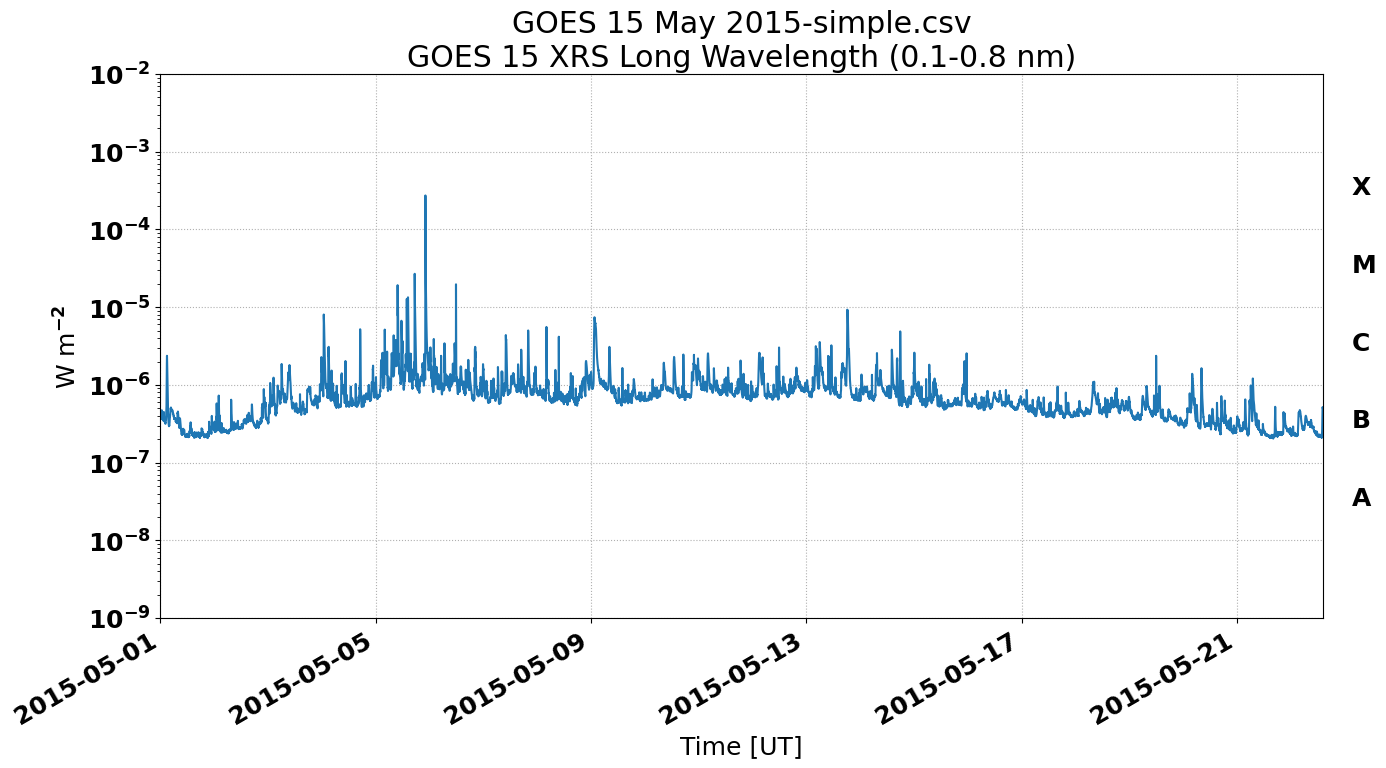

In [3]:
fnames = [] # Make a list of each of the Comma Separated Value (CSV) data files that will be loaded.

# Append each of the CSV files that willbe used to a list.
fnames.append('GOES 15 May 2013-simple.csv')
fnames.append('GOES 15 April 2014-simple.csv')
fnames.append('GOES 15 May 2015-simple.csv')

# Make a loop that loads and then plots each of the different data files.
for fname in fnames:
    # Load data from a single file into a Pandas Dataframe, ignore lines that start with #, and convert
    # timestamps into datetime objects.
    df_goes = pd.read_csv(fname,comment='#',parse_dates=['datetime'])
    
    # Create a new figure using the pyplot interface and set the size of the figure.
    fig = plt.figure(figsize=(15,8))
    
    # Add a single axis object to the figure using fig.add_subplot()
    ax  = fig.add_subplot(1,1,1)
    
    # Use a logarithmic scale for the y-axis.
    ax.set_yscale('log')

    xx = df_goes['datetime'] # Choose the 'datetime' column of the dataframe for the x-axis of the plot.
    yy = df_goes['B_AVG']    # Choose the 'B_AVG' channel of the dataframe for the y-axis of of the plot.
                             # 'B_AVG' is ithe 0.1-0.8 nm GOES X-Ray Sensor band data.
    ax.plot(xx,yy)           # Actually do the plotting.
    
    ax.set_xlabel('Time [UT]')   # Label the x-axis.
    fig.autofmt_xdate()          # Adjust the x-axis labels so that the dates fit.
    ax.set_ylabel('W m$^{-2}$')  # Label the y-axis for the x-ray measurements. Include the units!
                                 # Text between the dollar signs is LaTeX format for math formulas.
                                 # See https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes
    ax.set_title('{!s}\nGOES 15 XRS Long Wavelength (0.1-0.8 nm)'.format(fname)) # Add a title to your graph.
    
    # The code below labels the right-hand side of the plot so you know what class flare you are looking at.
    # Flare classes in ascending order are A, B, C, M, and X. Each represents and order of magnitude increase over
    # the previous one.
    transform = mpl.transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(1.025,3.5e-4,'X',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
    ax.text(1.025,3.5e-5,'M',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
    ax.text(1.025,3.5e-6,'C',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
    ax.text(1.025,3.5e-7,'B',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
    ax.text(1.025,3.5e-8,'A',transform=transform,va='center',fontdict={'size':18,'weight':'bold'})
    ax.set_ylim(1e-9,1e-2)

    # Show the plot!
    plt.show()